# loading the necessary libraries and the dataset.

In [1]:

# Importing the necessary librarie
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import RFECV
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, KFold
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix


#  Please provide the file path where the dataset is located.

In [2]:
# loading the dataset into a pandas dataframe.

df = pd.read_excel(r"C:\Users\KALITOH\Desktop\Book2.xlsx")

# Implement Feature Scaling to Normalize the data(compare the histogram/KDE for MinMaxScaler and StandardScaler): 

In [3]:

# Display first 5 rows of the dataset
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


# performing any necessary data cleaning.

In [4]:
# Display dataset information
#Exploratory Data Analysis
# exploring the dataset and performing any necessary data cleaning.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


# Exploratory Data Analysis: 


In [5]:
# Display statistical summary of the dataset
df.describe()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


# optimal number of features using RFECV and plot the number of features selected against cross-validation score

C:\Users\KALITOH\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


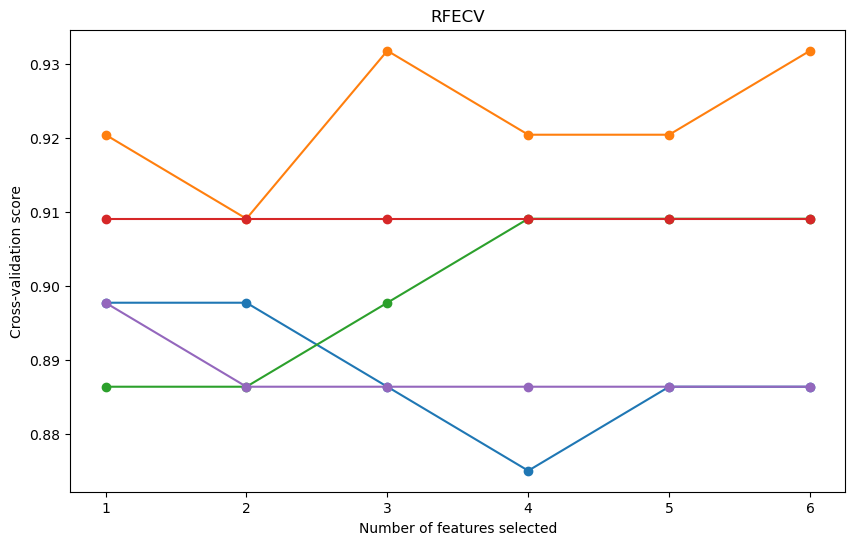

In [6]:

# Define the target variable
y = df['Channel']

# Define the features
X = df.drop(['Channel', 'Region'], axis=1)

# Create a logistic regression estimator
estimator = LogisticRegression(max_iter=10000)

# Create a recursive feature elimination object
rfe = RFECV(estimator, cv=5, scoring='accuracy')

# Fit the object to the data
rfe.fit(X, y)

# Plot the number of features selected vs cross-validation score
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(rfe.grid_scores_) + 1), rfe.grid_scores_, marker='o')
plt.xlabel('Number of features selected')
plt.ylabel('Cross-validation score')
plt.title('RFECV')
plt.show()



# KMeans clustering for K=2 to K=15 Using elbow plot to determine the optimal number of clusters: 

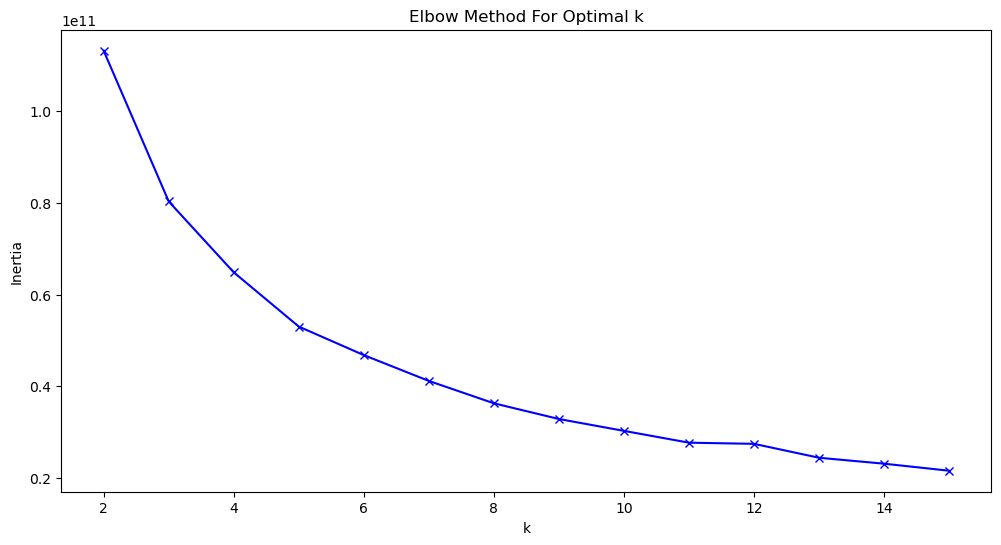

In [7]:

# get the data
X = df.drop(['Channel'], axis=1)

# elbow method to determine optimal number of clusters
inertias = []
K = range(2, 16)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# plot elbow curve
plt.figure(figsize=(12, 6))
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()


In [8]:
# Separate the target variable from the rest of the data
X = df.drop("Channel", axis=1)
y = df["Channel"]

In [9]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
from sklearn.preprocessing import MinMaxScaler

In [10]:

# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X_minmax = scaler.fit_transform(X)
X_minmax = pd.DataFrame(X_minmax, columns=X.columns)

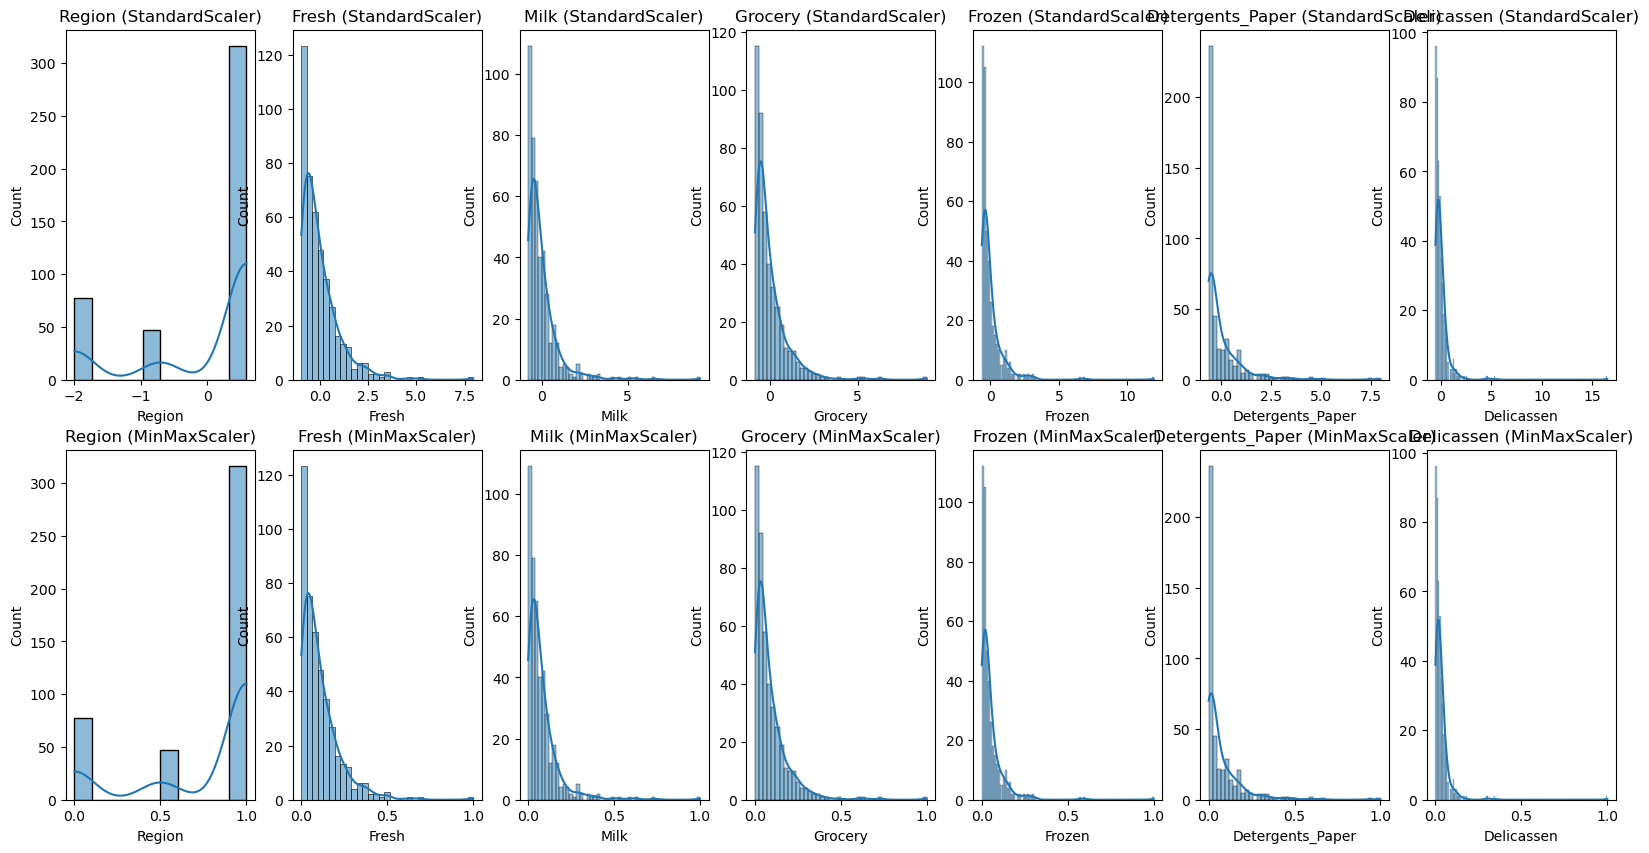

In [11]:
# Plot the histograms/KDEs for each feature using both scalers
fig, axes = plt.subplots(nrows=2, ncols=7, figsize=(20,10))
for i, col in enumerate(X.columns):
    sns.histplot(X_scaled[col], ax=axes[0,i], kde=True)
    sns.histplot(X_minmax[col], ax=axes[1,i], kde=True)
    axes[0,i].set_title(col + " (StandardScaler)")
    axes[1,i].set_title(col + " (MinMaxScaler)")

# Calculate variance explained by the first 2 components and by the first 4 components in PCA and visualize the clusters in the data using PCA: 

Explained variance by first 2 components:  0.8647858835001754
Explained variance by first 4 components:  0.978839407323483


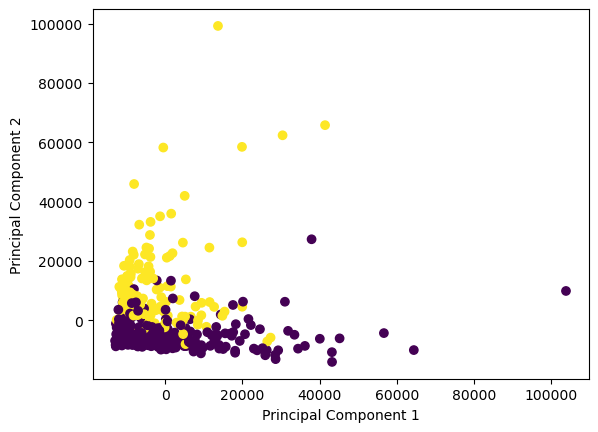

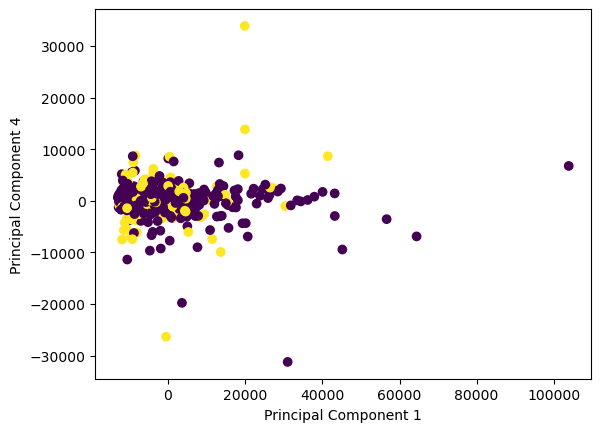

In [12]:

# Assuming X is  data matrix with features and y is target variable
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X)

# Explained variance by first 2 components
print("Explained variance by first 2 components: ", pca.explained_variance_ratio_[0:2].sum())

# Explained variance by first 4 components
print("Explained variance by first 4 components: ", pca.explained_variance_ratio_[0:4].sum())

# Plot clusters using first 2 principal components
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# Plot clusters using first 4 principal components
plt.scatter(X_pca[:, 0], X_pca[:, 3], c=y)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 4")
plt.show()


# Implement XGBoost Classifier with 5 Fold CV and report the performance metrics(precision, recall, and accuracy): 

In [13]:
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from xgboost import XGBClassifier

# Load the data
df = pd.read_excel(r"C:\Users\KALITOH\Desktop\Book2.xlsx")

# Split the data into features and target
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the XGBoost model
clf = XGBClassifier()

# Train the model
clf.fit(X_train, y_train)

# Use cross-validation to evaluate the model's performance
scores = cross_val_score(clf, X, y, cv=5)

# Print the performance metrics
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 1))
y_pred = clf.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


ValueError: Invalid classes inferred from unique values of `y`.  Expected: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284], got [    3     7    18    37    46    51    52    56    59    62    63    64
    65    70    72    84   110   117   120   127   128   130   132   142
   143   144   156   201   203   204   217   224   225   229   238   239
   247   249   254   255   258   259   270   285   287   288   290   291
   295   296   297   301   303   314   317   318   323   326   340   342
   347   361   373   375   379   395   396   404   405   406   411   433
   436   445   446   447   452   468   490   497   503   518   520   526
   529   531   537   545   548   550   553   569   572   573   578   602
   610   635   654   655   656   659   665   668   674   686   693   697
   698   709   710   712   714   715   716   727   731   739   741   750
   772   776   778   786   790   791   797   806   818   834   860   868
   903   911   918   925   929   933   961   964   987   993   995  1000
  1027  1037  1040  1043  1047  1059  1060  1067  1068  1092  1104  1111
  1113  1117  1136  1142  1145  1158  1163  1215  1218  1265  1266  1278
  1333  1360  1371  1378  1384  1386  1391  1393  1404  1423  1426  1438
  1440  1442  1450  1468  1476  1519  1521  1534  1542  1543  1553  1603
  1625  1637  1681  1682  1693  1697  1721  1744  1755  1774  1775  1776
  1780  1819  1824  1827  1831  1856  1867  1874  1902  1942  1970  2005
  2017  2100  2124  2137  2139  2157  2158  2162  2165  2168  2204  2233
  2235  2253  2341  2346  2379  2388  2398  2435  2498  2501  2503  2563
  2564  2602  2631  2708  2749  2784  2802  2870  2876  2893  2931  2944
  3029  3095  3105  3113  3137  3178  3182  3265  3271  3321  3486  3508
  3628  3637  4100  4430  4626  4829  5121  5130  5137  5185  5206  5609
  5864  6250  6465  6854  7844 14351 14472 16523 47943]